# Assignment 06

# Due: Wednesday 03/02/2022 (11am)

### Other important deadlines
* Project proposal submission: 03/09/2022, 11:00am (ET)
* Please arrange a zoom meeting or an in-person meeting with me to discuss a topic and data before 03/06/2021
* Midterm presentation: 03/23/2022 in class (online)
* Midterm packet (paper and presentation slides): 03/25/2022, 11:59pm (ET)

## In this assignment, we will review PCA/Sparse PCA and K-Means Clustering.
__Please submit a python script and markdown using Jupyter notebook (.ipynb file).__

* Don’t forget to finish the lab materials. 
* Please do not share your works publicly on GitHub or other places until the deadline.
* Some part of coding can be identical if you work with classmeates but annotation/comments must be individually written.

# Sparse PCA
In this problem you'll use Sparse PCA on a (subset of a) publicly available community-level dataset with a large-ish number of real-valued features related to socioeconomic and crime statistics. See here for more details on the dataset: http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime

### (1) Load data and create a column to indicate whether a community has above or below average violent crime levels
    filename: 'communities.csv'

In [1]:
import warnings
warnings.filterwarnings("ignore")

!pip install geopandas

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 3.7 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [ ]:
#Load communities dataset

data = pd.read_csv("/content/communities.csv")
data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.03


In [ ]:
#Create a column to see whether a community has above or below average violent crime levels

#data2=data["ViolentCrimesPerPop"].mean()

#calculate the average for violent crimes per pop


variable = np.mean(data['ViolentCrimesPerPop'])

#it is just copying over the column, how do I calculate then add to a column? 


In [ ]:
print(variable)

0.23797893681043028


In [ ]:
#create a new column with 0.23 as the threshold to be equal to ViolentCrimesPerPop
#name the new column to the left

#data["ViolentCrimeAvg"] = data[['ViolentCrimesPerPop']> variable] 

#data['ViolentCrimesPerPop'].where(data['ViolentCrimesPerPop'] <= variable, 0, inplace=True)

a = np.array(data['ViolentCrimesPerPop'].values)
data['ViolentCrimeAvg'] = np.where(a > variable, 1, 0)


In [ ]:
print(data)

      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  

In [ ]:
data['ViolentCrimesPerPop_binary']=data['ViolentCrimesPerPop']>np.mean(data['ViolentCrimesPerPop'])                                                                    
data = data.astype(float)
values = data.values
print("Features:\n",data.columns.values[0:25])
print("\nPrediction target:",data.columns.values[25:27])

Features:
 ['population' 'householdsize' 'racepctblack' 'racePctWhite' 'racePctAsian'
 'racePctHisp' 'agePct12t21' 'agePct12t29' 'agePct16t24' 'agePct65up'
 'numbUrban' 'pctUrban' 'medIncome' 'pctWWage' 'pctWFarmSelf' 'pctWInvInc'
 'pctWSocSec' 'pctWPubAsst' 'pctWRetire' 'medFamInc' 'perCapInc'
 'whitePerCap' 'blackPerCap' 'indianPerCap' 'AsianPerCap']

Prediction target: ['ViolentCrimesPerPop' 'ViolentCrimeAvg']


### (2) Using Sparse PCA, reduce the data dimensions to 2D
As you continue to lower alpha you should eventually get to a point where the two leading (sparse) principal components are both non-trivial. Find this alpha and print the first and second principal components (eigenvectors).

In [ ]:
from sklearn.decomposition import SparsePCA

In [ ]:
spca = SparsePCA(n_components=1, alpha=20)
X_proj = spca.fit_transform(values[:,0:25])
print (spca.components_)

spca = SparsePCA(n_components=1, alpha=13)
X_proj = spca.fit_transform(values[:,0:25])
print (spca.components_)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]


### (3) Reduce the data dimensions to 2D, using regular PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler().fit(data.values.data)
X_scaled = scaler.transform(data.values.data)

In [ ]:
pca = PCA(n_components=2).fit(X_scaled)

### (4) Plot the data projected onto the two leading (sparse) principal components and do the same thing for the regular PCA. 


* Color each datapoint according to the column that you created above about whether a community has above or below average violent crime levels.

Text(0, 0.5, 'Principal components')

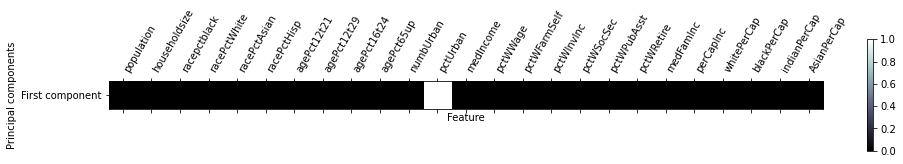

In [ ]:
#Plot the projections for Sparse principal components
plt.matshow(spca.components_, cmap='bone') 
plt.yticks([0], ["First component"]) 
plt.colorbar() 
plt.xticks(range(len(data.columns.values[0:25])),           
                          data.columns.values[0:25], rotation=60, ha='left') 
plt.xlabel("Feature") 
plt.ylabel("Principal components")



[[ 0.          0.          0.          0.          0.08452926  0.
  -0.01437503  0.          0.          0.          0.          0.84732
   0.24991722  0.09934853 -0.04212761  0.13330995 -0.03209831 -0.17139411
   0.          0.23043401  0.21349224  0.19896766  0.11347906  0.
   0.03565544]]
Index(['racePctAsian', 'agePct12t21', 'pctUrban', 'medIncome', 'pctWWage',
       'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'medFamInc',
       'perCapInc', 'whitePerCap', 'blackPerCap', 'AsianPerCap'],
      dtype='object')


Text(0, 0.5, 'Principal components')

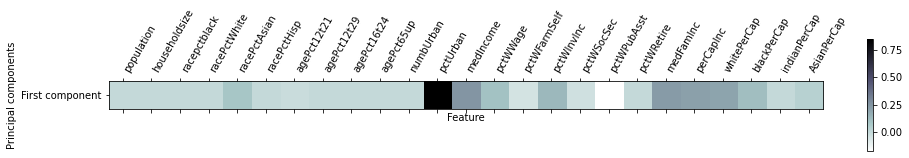

In [ ]:
spca = SparsePCA(n_components=1, alpha=2)
X_proj = spca.fit_transform(values[:,0:25])
print (spca.components_)
print(data.columns[0:25][spca.components_[0]!=0])


plt.matshow(spca.components_, cmap='bone_r') 
plt.yticks([0], ["First component"]) 
plt.colorbar() 
plt.xticks(range(len(data.columns.values[0:25])),           
                          data.columns.values[0:25], rotation=60, ha='left') 
plt.xlabel("Feature") 
plt.ylabel("Principal components")

Text(0, 0.5, 'Principal components')

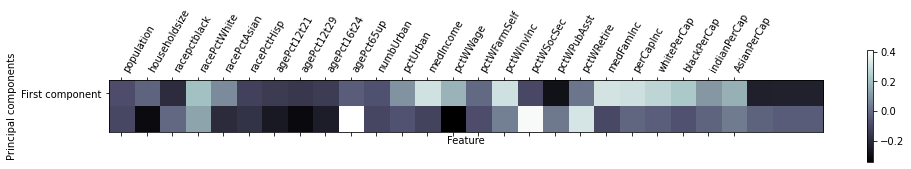

In [ ]:
#Plot the projects for PCA components

plt.matshow(pca.components_, cmap='bone') 
plt.yticks([0], ["First component"]) 
plt.colorbar() 
plt.xticks(range(len(data.columns.values[0:25])), data.columns.values[0:25], rotation=60, ha='left') 
plt.xlabel("Feature") 
plt.ylabel("Principal components")


### (5) Which projection (PCA or Sparse PCA) leads to better separation (as judged visually) between low crime and high crime communities; or are they about the same? 

In [ ]:
#Did I do this correctly? I cannot tell the separation between the two projections? 

#PCA transform data to new data, find coeffs use to multiply the original variables to get the new transformed values
#lighter gray is positive coeffs, the darker is negative coeffs. Showing the magnitude and coeff for transforming those values for the PC.

#changes from lighter to darker in the second component, first component is related to race and income, but the second shows another denation of the data
#the second is giving more weight to Age, rather than income and race from the first component

### (6) Compare the features identified by PCA and Sparse PCA as important. Is there strong overlap between the two sets of features?
If possible, create heat map to compare both results (refer to the example script below)
    
    plt.matshow(pca.components_, cmap='bone') 
    plt.yticks([0,1], ["First component", "Secomd component"]) 
    plt.colorbar() 
    plt.xticks(range(NUMBER_OF_FEATURES)),           
                              FEATURE_NAMES, rotation=60, ha='left') 
    plt.xlabel("Feature") 
    plt.ylabel("Principal components")

NameError: ignored

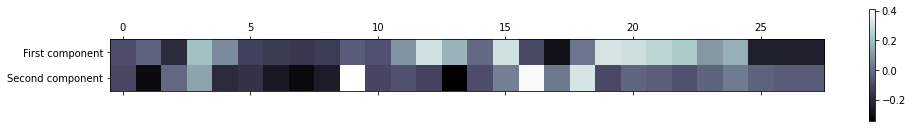

In [ ]:
#How do I know which number of features to compare? 
plt.matshow(pca.components_, cmap='bone') 
plt.yticks([0,1], ["First component", "Second component"]) 
plt.colorbar() 
plt.xticks(range(NUMBER_OF_FEATURES), FEATURE_NAMES, rotation=60, ha='left') 
plt.xlabel("Feature") 
plt.ylabel("Principal components")


# Cluster New York City business history
   
Goal: Cluster the economic trends in NYC using K-Means clustering algorithm
Dataset:

* New York City 1994-2013 business data ('nyc_business.csv')
* New York City zipcode data (You will need to download a shapdfile here https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u or you can use 'nyc-zip-code-tabulation-areas-polygons.geojson')

In [ ]:
# Load modules here


# 1. Data preparation and exploration
### (1) Load NYC 1994-2013 business data

    nyc_business.csv

In [ ]:
nyc_business=pd.read_csv("/content/nyc_business.csv")

In [ ]:
print(data)

      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  

In [ ]:
zipcode = gpd.read_file("/content/ZIP_CODE_040114.shp")
print(zipcode)

    ZIPCODE BLDGZIP        PO_NAME  POPULATION          AREA STATE    COUNTY  \
0     11436       0        Jamaica     18681.0  2.269930e+07    NY    Queens   
1     11213       0       Brooklyn     62426.0  2.963100e+07    NY     Kings   
2     11212       0       Brooklyn     83866.0  4.197210e+07    NY     Kings   
3     11225       0       Brooklyn     56527.0  2.369863e+07    NY     Kings   
4     11218       0       Brooklyn     72280.0  3.686880e+07    NY     Kings   
..      ...     ...            ...         ...           ...   ...       ...   
258   10310       0  Staten Island     25003.0  5.346328e+07    NY  Richmond   
259   11693       0   Far Rockaway     11052.0  3.497516e+06    NY     Kings   
260   11249       0       Brooklyn     28481.0  1.777221e+07    NY     Kings   
261   10162       1       New York         0.0  2.103489e+04    NY  New York   
262   10119       1       New York         0.0  1.263930e+05    NY  New York   

    ST_FIPS CTY_FIPS                   

In [ ]:
print(nyc_business)

       zip    94    95    96    97    98    99     0     1     2  ...     4  \
0    10001  6999  7088  7075  7154  7254  7233  7317  7188  7141  ...  7370   
1    10002  1784  1819  1919  2049  2003  2085  2277  2543  2269  ...  2551   
2    10003  3256  3377  3417  3535  3649  3659  3683  3602  3616  ...  3776   
3    10004  1115  1124  1133  1173  1176  1233  1294  1247  1253  ...  1283   
4    10004  1115  1124  1133  1173  1176  1233  1294  1247  1253  ...  1283   
..     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
238  11693    95    90    88    83    79    79    79    89    94  ...    96   
239  11693    95    90    88    83    79    79    79    89    94  ...    96   
240  11693    95    90    88    83    79    79    79    89    94  ...    96   
241  11694   294   285   287   294   291   284   288   301   302  ...   303   
242  11697    33    32    34    38    38    38    39    40    37  ...    43   

        5     6     7     8     9    10    11    12

### (2) Create X (input) variables as numpy array

1.   List item
2.   List item


* You don't need a zipcode column
* You need the rest of the columns (1994-2013) for your input features
* Please use .values function of pandas dataframe to create a numpy array (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html) - you can also find some reference from the last lab session (sparsePCA part)

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np




In [ ]:
nyc_business2=nyc_business.values[:,1:21] #this is a numpy array


#df=pd.DataFrame

#option 2

#spca = SparsePCA(n_components=1, alpha=20)
#X_proj = spca.fit_transform(values[:,0:25])
#print (spca.components_)

#option 3
#from sklearn.preprocessing import StandardScaler
#scaled_features = StandardScaler().fit_transform(df.values)

#In [15]: scaled_features[:3,:] #lost the indices
#Out[15]:
#array([[-1.89007341,  0.05636005,  1.74514417,  0.46669562],
       #[ 1.26558518, -1.35264122,  0.82178747,  0.59282958],
       #[ 0.93341059,  0.37841748, -0.60941542,  0.59282958]])

#scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)

#In [17]:  scaled_features_df.head(3)
#Out[17]:
   # col1    col2    col3    col4
#10  -1.890073   0.056360    1.745144    0.466696
#11  1.265585    -1.352641   0.821787    0.592830
#12  0.933411    0.378417    -0.609415   0.592830

#option 4
#features = ["col1", "col2", "col3", "col4"]
#autoscaler = StandardScaler()
#df[features] = autoscaler.fit_transform(df[features])

In [ ]:
print(nyc_business2)

[[6999 7088 7075 ... 7227 7235 7273]
 [1784 1819 1919 ... 2912 2954 2988]
 [3256 3377 3417 ... 4159 4214 4277]
 ...
 [  95   90   88 ...  131  129  127]
 [ 294  285  287 ...  326  326  327]
 [  33   32   34 ...   46   49   40]]


In [ ]:
#X, y = make_blobs(
   #n_samples=150, n_features=2, # create (150,2) shape data points - in other words, 150 rows and 2 columns
   #centers=3, cluster_std=0.5,
   #shuffle=True, random_state=0
#)

### (3) Normalize (z-score normalization) data

* Since the scale of the business change across the neighborhoods is different (i.e. some neighborhoods have changed approximately 6K - 7K scale, while other neighborhoods have changed around 30 - 40), you need to normalize data to compare neighborhoods' business change trends at the same scale. 
* Here we will apply a z-score normalization (mean = 0, std = 1) to _each neighborhood (zipcode)_.
* You can use stats.zscore() function (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html) and for loops to normalize all zipcodes.
* After the z-score normalization process, 
    * Your normalized array should be the same shape with the original array (that created just above)
    * Mean values and standard deviation values of each zipcode should be 0 and 1 respectively.
    
* __If you prefer other methods (e.g. StandardScaler or processing manually)__, feel free to stick with your own method.

In [ ]:
#z score normalization process

from sklearn.preprocessing import StandardScaler
#scaled_features = StandardScaler().fit_transform(df.values)

In [ ]:
#nyc_business3=np.transpose(nyc_business2)
scaler = StandardScaler()



In [ ]:
scaler.fit(nyc_business2)
X_scaled=scaler.transform(nyc_business2)


### (4) Plot the normalized data
* X-axis will be year (1994-2013)
* Y-axis will be normalized #of business in zipcode level
* Even though we have 20-dimensional data (20 years), the data can be represented 2-dimensional timeseries plot.

In [ ]:
#X, y = make_blobs(
   #n_samples=150, n_features=2, # create (150,2) shape data points - in other words, 150 rows and 2 columns
   #centers=3, cluster_std=0.5,
   #shuffle=True, random_state=0
#)

In [ ]:
df=pd.DataFrame(data=X_scaled)

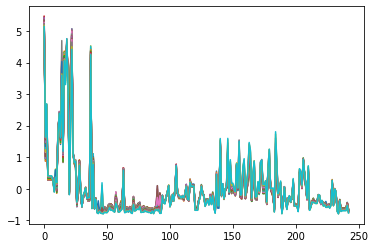

In [ ]:
# Plot X (two dimensional data) #x is year 
df.plot(legend=False)
#plt.figure(figsize=(5,5))
#plt.scatter(X[:,0], X[:,1],
           #c='white', marker='o',
           #edgecolor='black', s=50)

#plt.xlabel('X1 feature', fontsize=13)
#plt.ylabel('X2 feature', fontsize=13)
#plt.title('Scatter plot - two dimensional data', fontsize=15)

#there's three groups clustered

In [ ]:
X_scaled.shape

(20, 243)

# 2. K-Means Clustering Analysis
### (1) Cluster NYC business history using K=3

In [ ]:
km=KMeans(n_clusters=3) 

In [ ]:
group_km=km.fit_predict(X_scaled)

In [ ]:
group_km

array([2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

### (2) Plot NYC business history data (normalized) using three differnt color based on the clustering result

Text(0.5, 1.0, 'Scatter plot - two dimensional data')

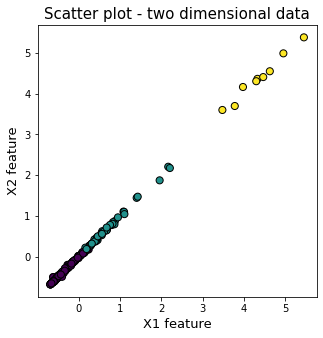

In [ ]:
# Plot X (two dimensional data)
plt.figure(figsize=(5,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1],
           c=group_km, marker='o',
           edgecolor='black', s=50)

plt.xlabel('X1 feature', fontsize=13)
plt.ylabel('X2 feature', fontsize=13)
plt.title('Scatter plot - two dimensional data', fontsize=15)

#there's three groups clustered
#need to check on this, how do we plot the neighborhoods with the business normalized?

In [ ]:
km=KMeans(n_clusters=3, random_state=0) #random statements equal 0

In [ ]:
group_km=km.fit_predict(X_scaled)
print(group_km)

[1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 0 0 0 0 0]


### (3) You could see some trends. In order to verify this, please add mean center line of each clusters using the same color but bold lineweight. 
* You need to calulate mean values of each cluster in every year and store as a list type.
* For your reference, you will get a similar plot like below. 
![image.png](attachment:image.png)

# 3. Find the optimal K using either elbow method or Silhoutte method

In [ ]:
#collect distortions into a list
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_scaled)
    distortions.append(kmeanModel.inertia_)

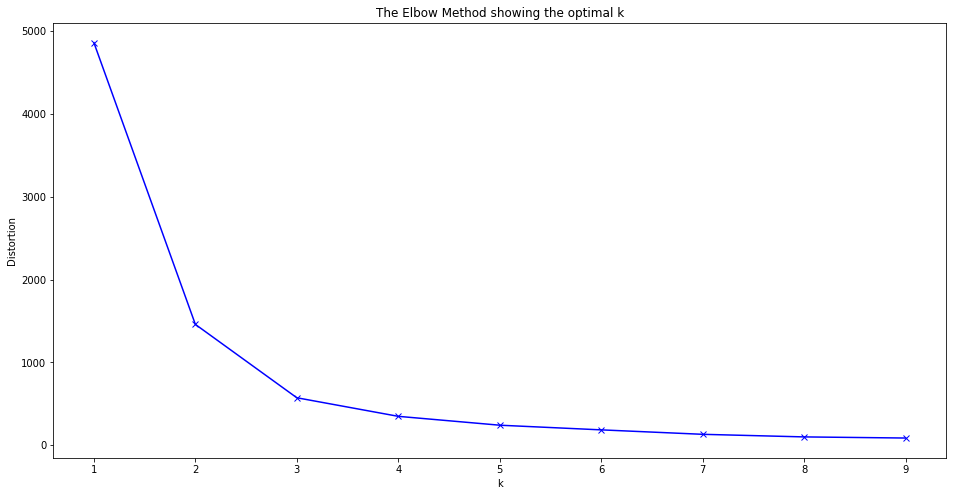

In [ ]:
#plot the distortions
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
#based on the plot resulting, change the elbow value or n_clusters
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X_scaled)

KMeans(n_clusters=3)

In [ ]:
#compare between the K-means and elbow value
X_scaled['k_means']=kmeanModel.predict(X_scaled)
X_scaled['target']=iris['target']
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X_scaled[0], X_scaled[1], c=X_scaled['target'])
axes[1].scatter(X_scaled[0], X_scaled[1], c=X_scaled['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18) #is there an actual value?
axes[1].set_title('K_Means', fontsize=18)

IndexError: ignored

# 4. Cluster NYC business trend using the optimal K that you found above.

In [ ]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X_scaled)

KMeans(n_clusters=3)

In [ ]:
group_km=kmeanModel.fit_predict(X_scaled)
nyc_business['group']=group_km
nyc_business.head()

,zip,94,95,96,97,98,99,0,1,2,...,5,6,7,8,9,10,11,12,13,group
0,10001,6999,7088,7075,7154,7254,7233,7317,7188,7141,...,7312,7415,7549,7472,7305,7241,7227,7235,7273,1
1,10002,1784,1819,1919,2049,2003,2085,2277,2543,2269,...,2682,2686,2685,2691,2775,2872,2912,2954,2988,2
2,10003,3256,3377,3417,3535,3649,3659,3683,3602,3616,...,3867,3909,4049,4071,4099,4113,4159,4214,4277,2
3,10004,1115,1124,1133,1173,1176,1233,1294,1247,1253,...,1260,1311,1370,1376,1379,1398,1404,1442,1479,2
4,10004,1115,1124,1133,1173,1176,1233,1294,1247,1253,...,1260,1311,1370,1376,1379,1398,1404,1442,1479,2


# 5. Plot the final clustering result (timeseries plot with mean center lines) using the optimal K

In [ ]:
#repeat the same elow method process but with the clustered NYC businesses

from matplotlib import pyplot


In [ ]:
group=nyc_business.groupby(by=["group"]).mean()

In [ ]:
print(plot)

     0     1     2     3     4     5     6     7     8     9    ...  233  234  \
94  6999  1784  3256  1115  1115  1115  1115  1076  1061  1307  ...   51    2   
95  7088  1819  3377  1124  1124  1124  1124  1109  1002  1274  ...   50    2   
96  7075  1919  3417  1133  1133  1133  1133  1216   969  1254  ...   53    2   
97  7154  2049  3535  1173  1173  1173  1173  1227   990  1287  ...   51    3   
98  7254  2003  3649  1176  1176  1176  1176  1270  1030  1282  ...   51    3   
99  7233  2085  3659  1233  1233  1233  1233  1242  1059  1303  ...   58    3   
0   7317  2277  3683  1294  1294  1294  1294  1287  1067  1327  ...   65    4   
1   7188  2543  3602  1247  1247  1247  1247  1249  1026  1233  ...   57    5   
2   7141  2269  3616  1253  1253  1253  1253  1244   934  1620  ...   78    5   
3   7084  2402  3704  1252  1252  1252  1252  1200   862  1603  ...   74    5   
4   7370  2551  3776  1283  1283  1283  1283  1226   869  1635  ...   84    5   
5   7312  2682  3867  1260  

In [ ]:
#plot=nyc_business.drop(columns=["zip","group"]).transpose()
plot=group.transpose()

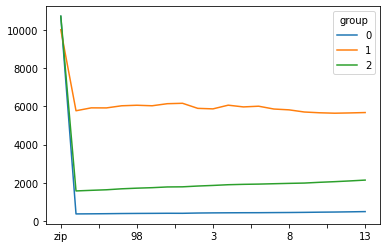

In [ ]:
plot.plot()

# 6. Mapping your clustering result and explain your findings
* New York City zipcode data (You will need to download a shapdfile here https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u or you can use 'nyc-zip-code-tabulation-areas-polygons.geojson' provided)
* GeoPandas is required for this task!